# MNIST Classifier of Hand Written Digits using Keras

Import the necessary dependencies and import the test and training data from mnist

In [66]:
import numpy as np
import matplotlib
matplotlib.use('agg')
import matplotlib.pyplot as plt

from keras.datasets import mnist
from keras.models import Sequential, load_model
from keras.layers.core import Dense, Dropout, Activation
from keras.utils import np_utils

# Reduce log level
import os
os.environ['TF_CPP_MIN_LOG_LEVEL']='3'

# The datasets
(X_train, y_train), (X_test, y_test) = mnist.load_data()

## Input Vector

Reshape and normalize the training data to 28x28 images. Meaning that the input vectors length will be same as the pixels i.e. 28x28 = 784.
Also specify the length of the categories i.e. 10 using one-hot encoding (i.e. making the values only ones and zeros e.g. [0,0,0,1,0,0,0,0,0,0] would represent the value 3) since we have images of values from 0-9.

In [86]:
X_train = X_train.reshape(X_train.shape[0], 784)
X_test = X_test.reshape(X_test.shape[0], 784)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

# Normalize the data to optimize training
X_train /= 255
X_test /= 255

# Print the final input shape ready for training
print("Train matrix shape", X_train.shape)
print("Test matrix shape", X_test.shape)

# One-hot encoding
n_classes = 10
Y_train = np_utils.to_categorical(y_train, n_classes)
Y_test = np_utils.to_categorical(y_test, n_classes)
print("Train categories shape", Y_train.shape)

Train matrix shape (60000, 784)
Test matrix shape (10000, 784)
Train categories shape (60000, 10)


## Keras Sequential Model

Using [Keras Sequential Model](https://keras.io/getting-started/sequential-model-guide/) we can create a linear layer stack. The model needs to know what input shape it should expect. For this reason, we need to specify the input shape.

We´re adding two hidden layers with 512 nodes each to compute enough complexity for recognizing the digits.

In [68]:
# Instatiate the Sequential Model
model = Sequential()

# Add first layer
# Set the input shape to the numbers of pixels => 28x28 = 784
model.add(Dense(512, input_shape=(784,)))
model.add(Activation('relu'))                            
model.add(Dropout(0.2))

# Second layer, no need to repeat input shape
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.2))

# Output
model.add(Dense(10))
model.add(Activation('softmax'))

# Compile the model using cross entropy loss
# and Adam (https://arxiv.org/abs/1412.6980v8) gradient-based optimizer
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')

## Training the Model

Training the model for 10 epochs. The lower the loss, the better.

In [76]:
%matplotlib inline

# Training the model for 10 epochs
model_train = model.fit(X_train, Y_train,
          batch_size=128, epochs=10,
          verbose=2,
          validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
 - 9s - loss: 0.0131 - acc: 0.9960 - val_loss: 0.0887 - val_acc: 0.9833
Epoch 2/10
 - 10s - loss: 0.0143 - acc: 0.9954 - val_loss: 0.0881 - val_acc: 0.9839
Epoch 3/10
 - 10s - loss: 0.0123 - acc: 0.9963 - val_loss: 0.0779 - val_acc: 0.9839
Epoch 4/10
 - 8s - loss: 0.0123 - acc: 0.9962 - val_loss: 0.0872 - val_acc: 0.9838
Epoch 5/10
 - 13s - loss: 0.0126 - acc: 0.9960 - val_loss: 0.1029 - val_acc: 0.9817
Epoch 6/10
 - 9s - loss: 0.0124 - acc: 0.9959 - val_loss: 0.0854 - val_acc: 0.9848
Epoch 7/10
 - 9s - loss: 0.0095 - acc: 0.9968 - val_loss: 0.0940 - val_acc: 0.9831
Epoch 8/10
 - 8s - loss: 0.0121 - acc: 0.9963 - val_loss: 0.0927 - val_acc: 0.9836
Epoch 9/10
 - 8s - loss: 0.0111 - acc: 0.9967 - val_loss: 0.1075 - val_acc: 0.9830
Epoch 10/10
 - 9s - loss: 0.0126 - acc: 0.9967 - val_loss: 0.0867 - val_acc: 0.9839


## Test & Evaluate


9839  classified correctly
161  classified incorrectly


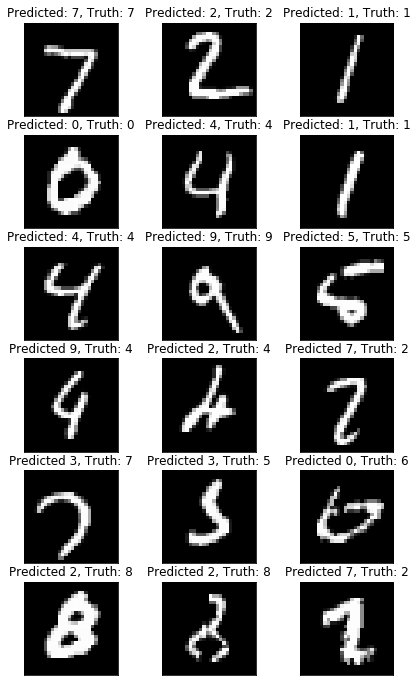

In [85]:
%matplotlib inline

# Get the model predictions on the test set
predicted_classes = model.predict_classes(X_test)

# Create arrays using numpy to evaluate the predictions
correct_indices = np.nonzero(predicted_classes == y_test)[0]
incorrect_indices = np.nonzero(predicted_classes != y_test)[0]
print()
print(len(correct_indices)," classified correctly")
print(len(incorrect_indices)," classified incorrectly")


# Set figure image size
plt.rcParams['figure.figsize'] = (7,12)

figure_evaluation = plt.figure()

# Plot 9 correct predictions
for i, correct in enumerate(correct_indices[:9]):
    plt.subplot(6,3,i+1)
    plt.imshow(X_test[correct].reshape(28,28), cmap='gray', interpolation='none')
    plt.title(
      "Predicted: {}, Truth: {}".format(predicted_classes[correct],
                                        y_test[correct]))
    plt.xticks([])
    plt.yticks([])

# Plot 9 incorrect predictions
for i, incorrect in enumerate(incorrect_indices[:9]):
    plt.subplot(6,3,i+10)
    plt.imshow(X_test[incorrect].reshape(28,28), cmap='gray', interpolation='none')
    plt.title(
      "Predicted {}, Truth: {}".format(predicted_classes[incorrect], 
                                       y_test[incorrect]))
    plt.xticks([])
    plt.yticks([])